In [1]:
import xlrd #xlrd for excel files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
suicide_data = pd.read_excel('suicide.xlsx')
suicide_data.head(10) #view head data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.0,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.0,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.0,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.0,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.0,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,0.0,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,0.0,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,0.0,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,0.0,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,0.0,2156624900,796,Generation X


In [3]:
suicide_data.tail(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,63067077179,2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,63067077179,2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,63067077179,2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,63067077179,2309,Silent
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,Uzbekistan2014,0.675,63067077179,2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,63067077179,2309,Boomers


### Getting relevant information from the data set

In [4]:
suicide_data.shape


(27820, 12)

In [5]:
suicide_data.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        27820 non-null  float64
 9    gdp_for_year ($)   27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
suicide_data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.233483,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.359769,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.000000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.000000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.677000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


In [8]:
suicide_data.isnull().sum()
#yay no missing values

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [9]:
#A new variable to handle white spaces
new_data =suicide_data.replace(r'^\s*$',np.nan,regex=True) #displace white spaces as nan
new_data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.000,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.000,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.000,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.000,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.000,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


In [10]:
# Converting data to numeric
#convert the objects data to numeric to be able to plot graphs
#new_data['age']=new_data['age'].astype(str).str.replace(',','').astype(float)

### Visualization

<Figure size 1800x1080 with 0 Axes>

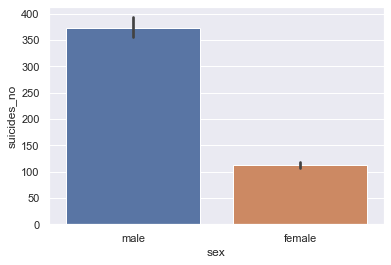

<Figure size 1800x1080 with 0 Axes>

In [11]:
sns.barplot(x='sex',y='suicides_no',data=suicide_data)
plt.figure(figsize=(25,15))

<Figure size 2160x1080 with 0 Axes>

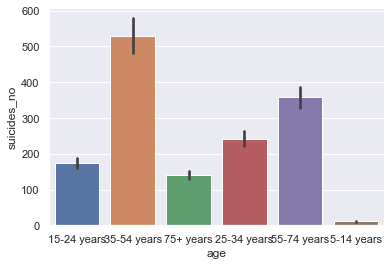

<Figure size 2160x1080 with 0 Axes>

In [12]:
sns.barplot(x='age',y='suicides_no',data=suicide_data)
plt.figure(figsize=(30,15))

In [13]:
#suicide_data['country'].value_counts().head(30).plot(kind='barh',  figsize=(20,15))

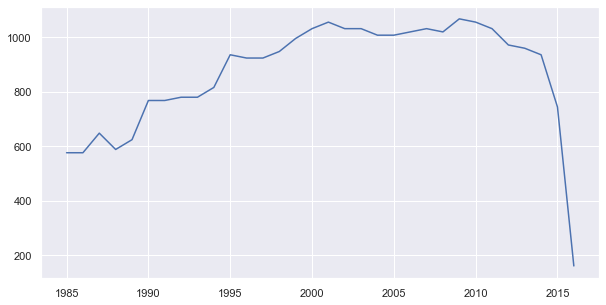

In [14]:
plt.figure(figsize=(10,5))
plt.plot(suicide_data['year'].value_counts().sort_index())

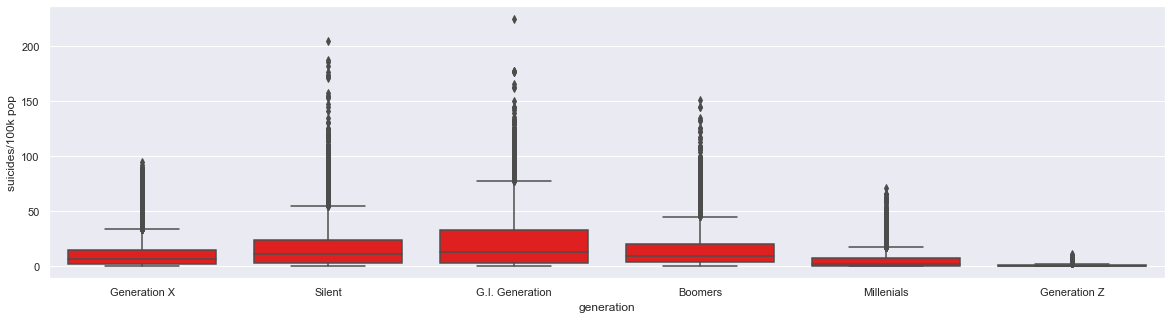

In [15]:
plt.figure(figsize=(20,5))
sns.boxplot(
    data=suicide_data,
    x='generation',
    y='suicides/100k pop',
    color='red')

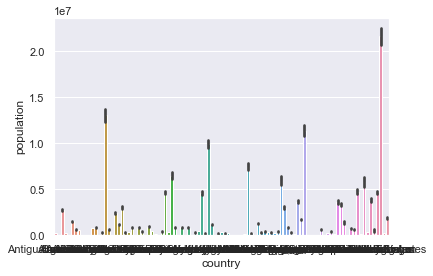

In [16]:
sns.barplot(x='country',y='population',data=suicide_data)